## Author: Joseph Vargovich

In [1]:
#Import libraries
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import random as rand



# Exercise 1 - FloridaLakes ordered bar graph

Text(0.5, 1.0, 'Average Mercury Content of Lakes in Florida')

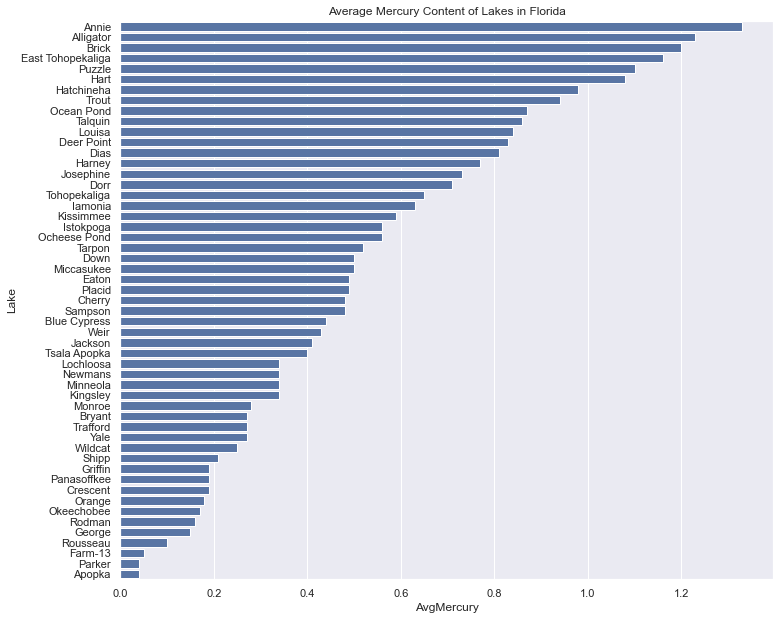

In [10]:
#Load the data from csv
FloridaLakes = pd.read_csv("FloridaLakes.csv")

# Sort the lakes by their AvgMercury
FloridaLakes = FloridaLakes.sort_values(by='AvgMercury', ascending=False)
FloridaLakes.head()

#Set custom dimensions for the figure
sns.set(rc={'figure.figsize':(11.7,10.27)})
#Graph the data
lakePlot = sns.barplot(x="AvgMercury", y="Lake", data=FloridaLakes, color="b")
lakePlot.set_title('Average Mercury Content of Lakes in Florida')


# Exercise 2 - FootballBrain box plot with changed labels in the Group column

AxesSubplot(0.125,0.125;0.775x0.755)


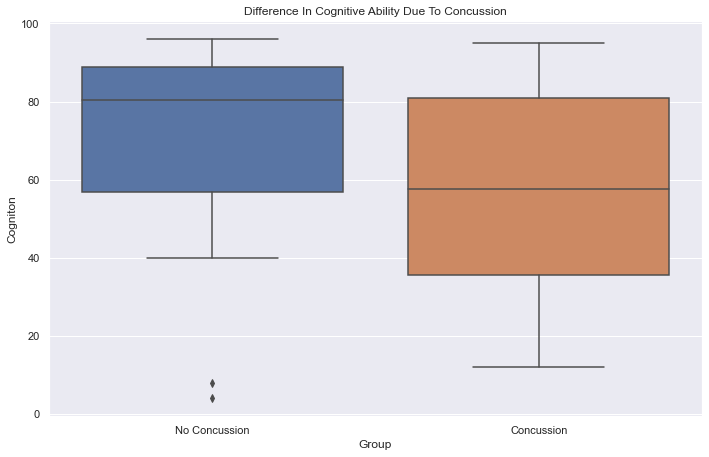

In [3]:
#Load the data from csv
FootballBrain = pd.read_csv("FootballBrain.csv")

FootballBrain.head()

# Drop columns with no value for Coniton
FootballBrain = FootballBrain.dropna()

# Replace columns with readable names to represent presence of concussion. 
FootballBrain = FootballBrain.assign(Group = ['No Concussion' if a == "FBNoConcuss" else 'Concussion' for a in FootballBrain['Group']])

#Set custom dimensions for the figure
sns.set(rc={'figure.figsize':(15.7,11.27)})
#Create the box plot itself
concussBoxPlot = sns.boxplot(x='Group',y='Cogniton', data=FootballBrain)

#Add an appropriate title to the graph
concussBoxPlot.set_title('Difference In Cognitive Ability Due To Concussion')

print(concussBoxPlot)


# Exercise 3 -  ResturauntTips data graphing and manipulation

Text(0.5, 0.98, 'Tip Percentages Based On The Total Bill And Payment Methods')

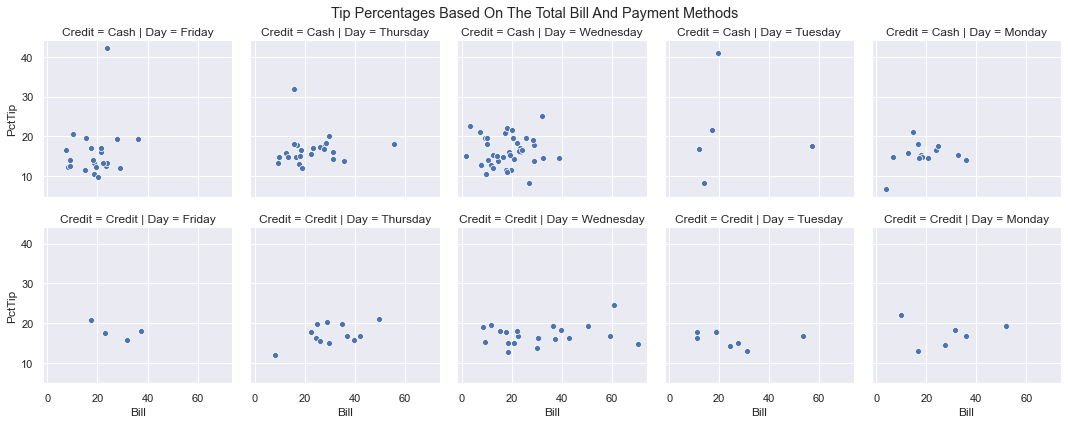

In [9]:
RestaurantTips = pd.read_csv("RestaurantTips.csv")

#Replace levels of the day column to represent each day with the full word
RestaurantTips['Day'] = np.where((RestaurantTips.Day == 'm'),'Monday',RestaurantTips.Day)
RestaurantTips['Day'] = np.where((RestaurantTips.Day == 't'),'Tuesday',RestaurantTips.Day)
RestaurantTips['Day'] = np.where((RestaurantTips.Day == 'w'),'Wednesday',RestaurantTips.Day)
RestaurantTips['Day'] = np.where((RestaurantTips.Day == 'th'),'Thursday',RestaurantTips.Day)
RestaurantTips['Day'] = np.where((RestaurantTips.Day == 'f'),'Friday',RestaurantTips.Day)

#Replace levels of the Credit column to say Credit or Cash instead of y or n
RestaurantTips['Credit'] = np.where((RestaurantTips.Credit == 'y'),'Credit',RestaurantTips.Credit)
RestaurantTips['Credit'] = np.where((RestaurantTips.Credit == 'n'),'Cash',RestaurantTips.Credit)

#Set custom dimensions for the figure
sns.set(rc={'figure.figsize':(30,20)})

#Create a facet grid for our graph
grid = sns.FacetGrid(RestaurantTips, col="Day", row="Credit")

#Create a graph from the facet grid
grid.map(sns.scatterplot, "Bill", "PctTip")

#Make a title and some room for it
plt.subplots_adjust(top = .9)
grid.fig.suptitle('Tip Percentages Based On The Total Bill And Payment Methods')